<a href="https://colab.research.google.com/github/abellokeefe/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

#Assignment TODOs:

1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

2) Load a dataset from your local machine.

Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 

3) Make Crosstabs of the Categorical Variables
Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.

4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

5) Create at least one visualization from a crosstab:
Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.

#STRETCH
##Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

#IMPORT

In [0]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#PRACTICE
(using adult and flag datasets)


##Adult Dataset


In [0]:
#upload data
adult_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [4]:
#read and output OG data
adults = pd.read_csv(adult_data_url)
adults.head()

NameError: ignored

In [0]:
#add columns to data
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain',  'capital-loss', 'hours-per-week', 
                 'native-country', 'income']

adults_df = pd.read_csv(adult_data_url, names=column_headers, na_values=" ?")
print("With Columns:")
adults_df.head()

In [0]:
#EDA:

In [0]:
#count null vals
adults_df.isnull().sum()

In [0]:
#drop null values
df_notnull = adults_df.dropna()
df_notnull.head()

In [0]:
#shapes
print("original data shape: ", adults_df.shape())
print("data after dropna: ", df_notnull.shape())

In [0]:
#describe numeric columns
adults_df.describe()

In [0]:
#describe non-numeric values
adults_df.describe(exclude='number')

In [0]:
#describe all
adults_df.describe(include='all')

In [0]:
#print data types
adults_df.dtypes()

In [0]:
adults_df['marital-status'].value_counts()

In [0]:
adults_df['education'].value_counts()

In [0]:
pd.crosstab(adults_df['marital-status'], adults_df['education'])

In [0]:
#drop age column
df_dropAge = adults_df.drop('age', axis=1)
df_dropAge.head()

In [0]:
#drop 1st row
df_drop_first = adults_df.drop(0)
df_drop_first.head()

In [0]:
#BASIC VISUALIZATIONS:
#line plot
#Histogram
#Scatter Plot
#Density Plot
#Making plots of our crosstabs

In [0]:
#line plot
adults_df.plot.line()

In [0]:
#histogram
adults_df.plot.hist()

In [0]:
adults_df.plot.scatter('age', 'hours-per-week')

In [0]:
#density plot
adults_df['hours-per-week'].plot.density()

In [0]:
#histogram with crosstab
adults_df['hours-per-week'].plot.hist(bins=16);

##Flags Dataset


In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

flag_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

!curl http://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

In [0]:
import pandas as pd
#initial read
flags = pd.read_csv(flag_data_url)
print("OG Data")
flags.head()

In [0]:
this_columns = ['name', 'landmass', 'zone', 'area', 'population', 'language', 
                  'religion', 'bars', 'stripes', 'colours', 'red', 'green', 
                  'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 
                  'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 
                  'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 
                  'botright']

df = pd.read_csv(flag_data_url, names=this_columns)
print("Data with Columns")
df.head()


In [0]:
#check for null values
df.isnull().sum()
#describe
df.describe()

In [0]:
#describe non-numeric values
df.describe(exclude='number')

In [0]:
df.shape

In [0]:
df.dtypes
df['landmass'].value_counts() #pick a numeric column

In [0]:
pd.crosstab(df['landmass'],df['green'])

In [0]:
#drop the "stripes" column from the table. axis=1 for columns, default is row
df.drop(['stripes'], axis=1)

In [0]:
#drop first row
df.drop(0)

In [0]:
#drop null values from first row
df.dropna(0) #if this row has a null value it will not appear

#DATASET 1
(uploaded from url)

Dataset Info: 

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. 



In [0]:
#upload data, read original csv
abalone_data = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
#!curl http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
abalone_df = pd.read_csv(abalone_data)
abalone_df.head()

In [0]:
#add column headers
abalone_headers = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
a_df = pd.read_csv(abalone_data, names=abalone_headers)
a_df.head()

In [0]:
#notes from data info: From the original data examples with missing values were removed
a_df.isnull().sum()

In [0]:
#describe
a_df.describe(include='all')

In [0]:
#basic visualizations (histogram, scatter, density)
a_df.plot.hist()

In [0]:
#using matplotlib
fig, ax = plt.subplots()
plt.hist(a_df['Whole Weight'], bins=12)
ax.set_xlabel('Weight')
ax.set_ylabel('Freq')

In [0]:
#focus attributes
s = a_df['Sex']
s_name = ['Sex']
w = a_df['Whole Weight']
w_name = ['Whole Weight']

M    1528
I    1342
F    1307
Name: Sex, dtype: int64 





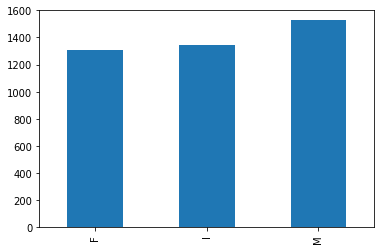

In [107]:
#value count & sort (column: 'Sex')
print(s.value_counts(),"\n") #val count
s_v =s.value_counts().sort_index() #sort val count
print("\n") #new line
s.value_counts().sort_index().plot.bar() #plot sorted val count

0.2225    8
0.1960    7
0.9700    7
0.4775    7
1.1345    7
         ..
0.7315    1
0.3525    1
0.2795    1
0.6870    1
0.7185    1
Name: Whole Weight, Length: 2429, dtype: int64 





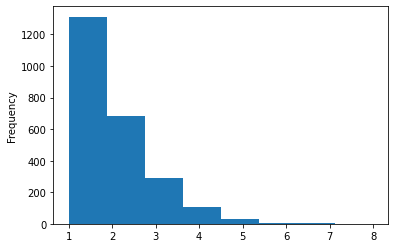

In [106]:
#value count & sort (column: 'Weight')
print(w.value_counts(),"\n") #val count
w_v = w.value_counts().sort_index() #sort val count
print("\n") #new line
w_v.plot.hist(bins=8) #plot sorted val count

In [168]:
#crosstab sex & whole weight
pd.crosstab(s,w, rownames=s_name, colnames=w_name)
pd.crosstab(a_df['Sex'], a_df['Whole Weight'])

Whole Weight,0.0020,0.0080,0.0105,0.0130,0.0140,0.0145,0.0150,0.0155,0.0175,0.0180,0.0190,0.0195,0.0210,0.0215,0.0230,0.0235,0.0240,0.0245,0.0265,0.0270,0.0275,0.0280,0.0290,0.0295,0.0300,0.0305,0.0315,0.0320,0.0325,0.0330,0.0340,0.0345,0.0350,0.0360,0.0370,0.0375,0.0380,0.0385,0.0400,0.0410,...,2.1410,2.1425,2.1505,2.1650,2.1730,2.1835,2.1945,2.1980,2.1995,2.2010,2.2100,2.2205,2.2260,2.2305,2.2355,2.2360,2.2385,2.2500,2.2550,2.2635,2.2695,2.2730,2.3020,2.3235,2.3305,2.3330,2.3810,2.3980,2.4925,2.4990,2.5050,2.5085,2.5155,2.5260,2.5480,2.5500,2.5550,2.6570,2.7795,2.8255
Sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0
I,1,1,1,1,1,2,1,0,1,2,1,1,2,1,0,2,0,0,2,1,1,1,2,1,1,0,2,1,1,1,1,1,0,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
M,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,3,1,1,1,0,1,2,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,0,1,1


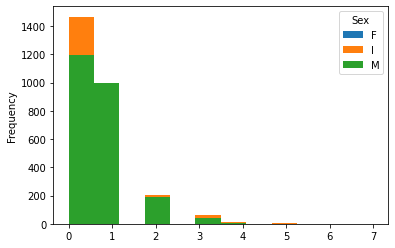

In [178]:
#crosstab dataframe
ct_df = pd.crosstab(a_df['Whole Weight'],a_df['Sex'])
#visualization
ct_df.plot.hist(bins=12)

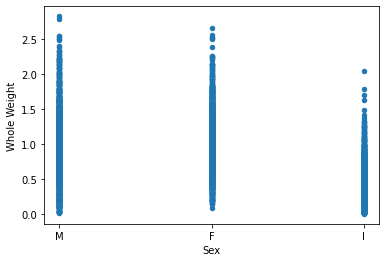

In [122]:
a_df.plot.scatter(0,4) #scatter plot of s & w

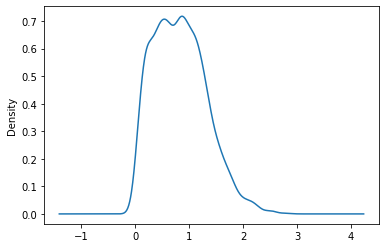

In [135]:
w.plot.density() #density plot of whole weights

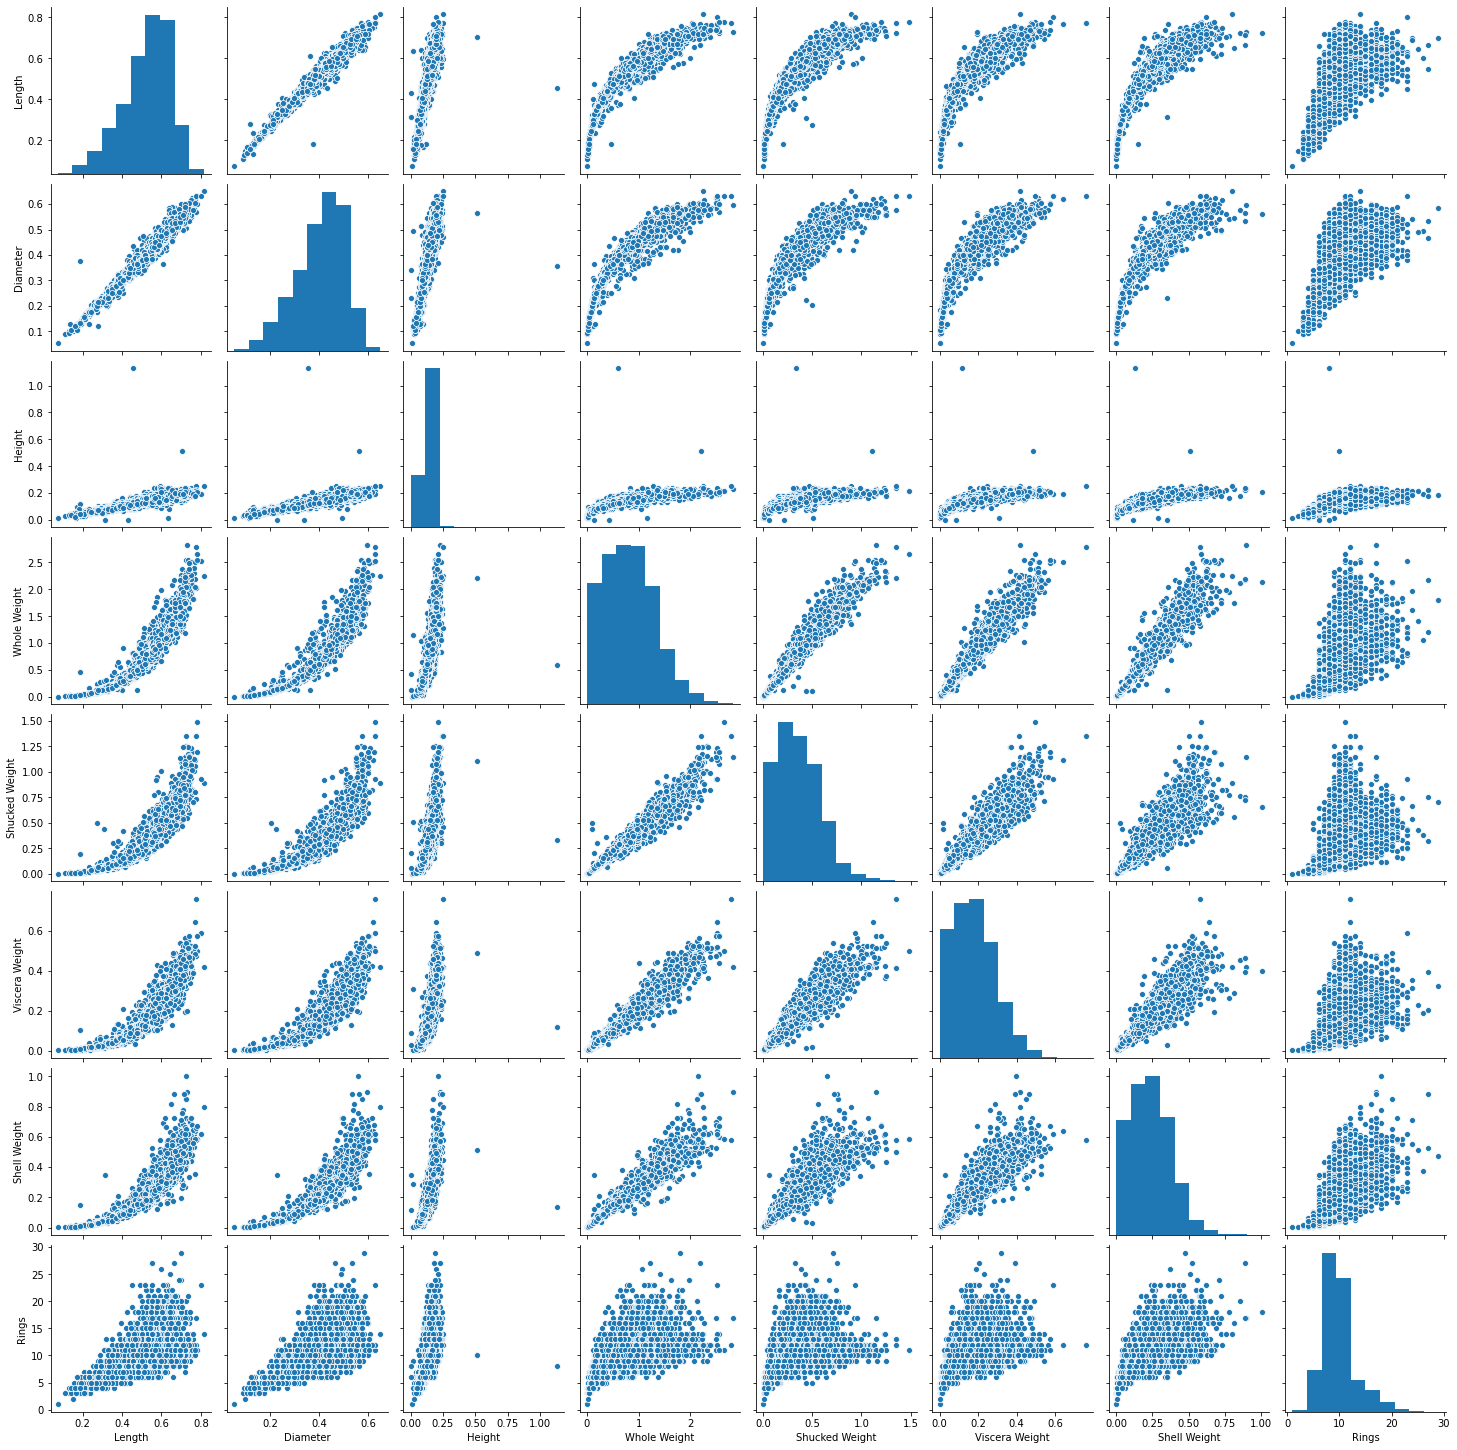

In [221]:
#USING SEABORN (as sb) PAIRPLOT
sb.pairplot(a_df)

#DATASET 2
(uploaded from local drive)

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [136]:
from google.colab import files
uploaded = files.upload()
#this worked, but since you can't see the local file I'm uploading it from the url

Saving iris.data to iris.data


In [190]:
#columns were not labeled
column_head = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'class']
iris_df = pd.read_csv('iris.data', names=column_head)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [191]:
#isnull
print("Null count results: \n")
print(iris_df.isnull().sum(), "\n")
#describe
print("Describe:")
iris_df.describe()


Null count results: 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
class                0
dtype: int64 

Describe:


,sepal length (cm),sepal width (cm),petal length (cm)
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


Density plot and histogram: 



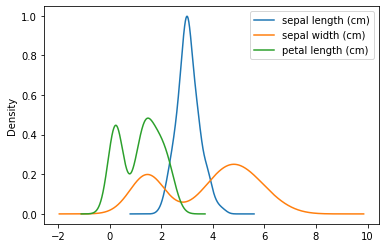

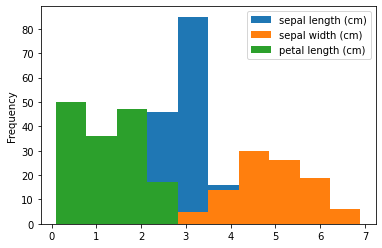

In [204]:
#visualisations
print("Density plot and histogram: \n")
iris_df.plot.density()
iris_df.plot.hist()

In [193]:
#cross tab and value count (class/length)
pd.crosstab(iris_df['class'], iris_df['sepal length (cm)'])

sepal length (cm),2.0,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4
class,,,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,0,0,1,0,0,0,0,0,1,6,5,5,2,9,6,2,3,4,2,1,1,1,1
Iris-versicolor,1,2,3,3,4,3,5,6,7,8,3,3,1,1,0,0,0,0,0,0,0,0,0
Iris-virginica,0,1,0,0,4,2,4,8,2,12,4,5,3,2,0,1,0,2,0,0,0,0,0


Scatter plot: class/length


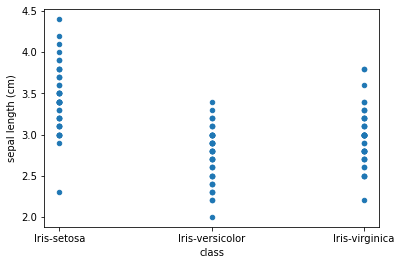

In [194]:
#scatter plot of the crosstab attributes
print("Scatter plot: class/length")
iris_df.plot.scatter(3,0)

new dataframe: 
visualization: 


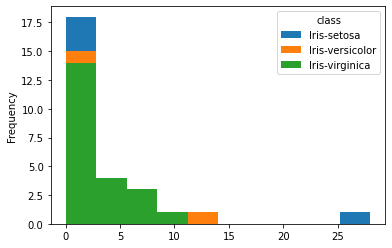

In [196]:
#crosstab dataframe & visualization
print("new dataframe: ")
iris_ct_df = pd.crosstab(iris_df['petal length (cm)'],iris_df['class'])
iris_ct_df.head()

print("visualization: ")
iris_ct_df.plot.hist()

#DATASET 3
(same iris dataset, dataset 2, but from url...some changes in variable names)

In [200]:
iris_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'class']
iris_data = pd.read_csv(iris_url, names=columns)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [201]:
#isnull
print("Null count results: \n")
print(iris_data.isnull().sum(), "\n")
#describe
print("Describe:")
iris_data.describe()

Null count results: 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
class                0
dtype: int64 

Describe:


,sepal length (cm),sepal width (cm),petal length (cm)
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


Density plot and histogram: 



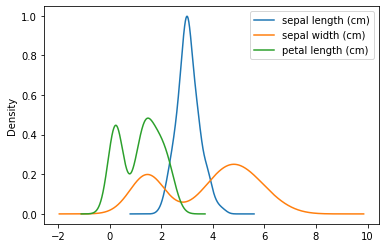

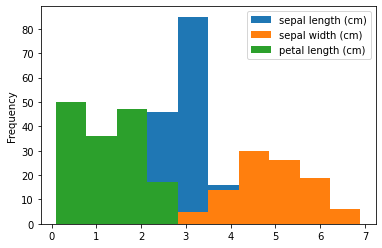

In [203]:
#visualisations
print("Density plot and histogram: \n")
iris_data.plot.density()
iris_data.plot.hist()

In [205]:
#cross tab and value count (class/length)
pd.crosstab(iris_data['class'], iris_data['sepal length (cm)'])

sepal length (cm),2.0,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4
class,,,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,0,0,1,0,0,0,0,0,1,6,5,5,2,9,6,2,3,4,2,1,1,1,1
Iris-versicolor,1,2,3,3,4,3,5,6,7,8,3,3,1,1,0,0,0,0,0,0,0,0,0
Iris-virginica,0,1,0,0,4,2,4,8,2,12,4,5,3,2,0,1,0,2,0,0,0,0,0


Scatter plot: class/length


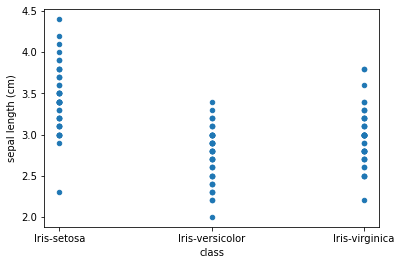

In [206]:
#scatter plot of the crosstab attributes
print("Scatter plot: class/length")
iris_df.plot.scatter(3,0)

new dataframe: 
visualization: 


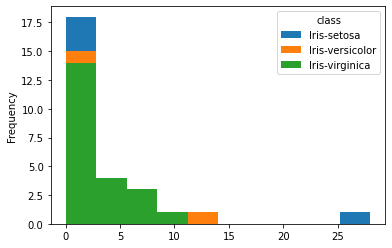

In [207]:
#crosstab dataframe & visualization
print("new dataframe: ")
iris_ct_df = pd.crosstab(iris_df['petal length (cm)'],iris_df['class'])
iris_ct_df.head()

print("visualization: ")
iris_ct_df.plot.hist()

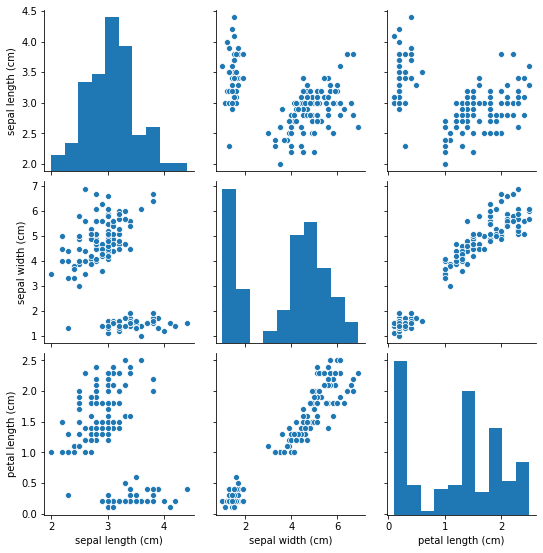

In [220]:
#USING SEABORN (as sb) PAIRPLOT
sb.pairplot(iris_data)